In [6]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('C:/Users/Alexei/SupervisedMl.csv')

In [8]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [10]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [11]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [12]:
data.shape

(25, 2)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Least squares regression

In [14]:
reg = smf.ols(formula = 'Scores~Hours', data=data)
r = reg.fit()
print(r.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           9.13e-17
Time:                        11:44:59   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4837      2.532      0.981      0.3

In [15]:
#Splitting the dataset
x = data['Hours']
y = data['Scores']
#reshape
x = x.values.reshape(len(x),1)
y = y.values.reshape(len(y),1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=(1/10),random_state=0)

In [16]:
#Fitting the linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [17]:
#Predicting the test result
y_pred = regressor.predict(x_test)
y_pred

array([[17.30220982],
       [34.05529402],
       [75.44526674]])

In [18]:
y_test

array([[20],
       [27],
       [69]], dtype=int64)

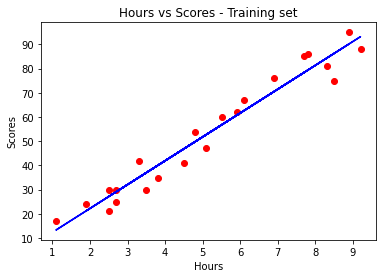

In [19]:
#Vizualisations
#Plot for the training dataset
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,regressor.predict(x_train), color='blue')
plt.title("Hours vs Scores - Training set")
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

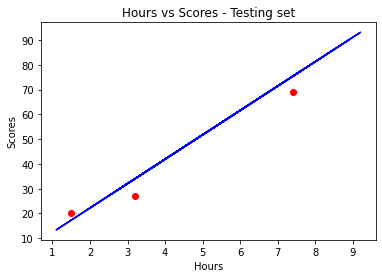

In [20]:
#Plot for the Test
plt.scatter(x_test,y_test,color='red')
plt.plot(x_train,regressor.predict(x_train),color='blue')
plt.title("Hours vs Scores - Testing set")
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

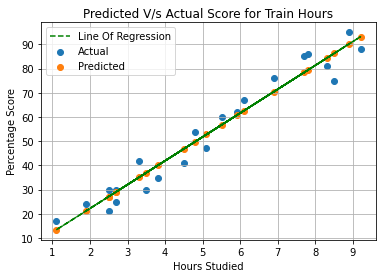

In [21]:
plt.scatter(x_train,y_train,label = 'Actual')
plt.scatter(x_train,regressor.predict(x_train),label= 'Predicted')
plt.plot(x_train,regressor.predict(x_train),'--g',label='Line Of Regression')

plt.title('Predicted V/s Actual Score for Train Hours')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')

plt.legend()
plt.grid()
plt.show()

In [26]:
#to calculate how accurate the model is
accuracy = regressor.score(x_test, y_test)
print("Model's accuracy is: ", accuracy)

Model's accuracy is:  0.9298077534821835
